# Getting started

In scikit-network, a graph is represented by its [adjacency matrix](https://en.wikipedia.org/wiki/Adjacency_matrix) (or biadjacency matrix for a bipartite graph) in the [Compressed Sparse Row](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html) format of SciPy.

In this tutorial, we present a few methods to instantiate a graph in this format.

In [77]:
from IPython.display import SVG

import numpy as np
from scipy import sparse
import pandas as pd

from sknetwork.utils import edgelist2adjacency, edgelist2biadjacency
from sknetwork.data import convert_edge_list, load_edge_list
from sknetwork.visualization import svg_graph, svg_digraph, svg_bigraph

## From a NumPy array
For small graphs, you can instantiate the adjacency matrix as a dense NumPy array and convert it into a sparse matrix in CSR format.

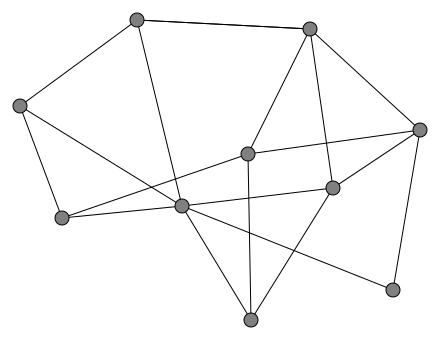

In [2]:
adjacency = np.array([[0, 1, 1, 0], [1, 0, 1, 1], [1, 1, 0, 0], [0, 1, 0, 0]])
adjacency = sparse.csr_matrix(adjacency)

image = svg_graph(adjacency)
SVG(image)

## From an edge list
Another natural way to build a graph is from a list of edges.

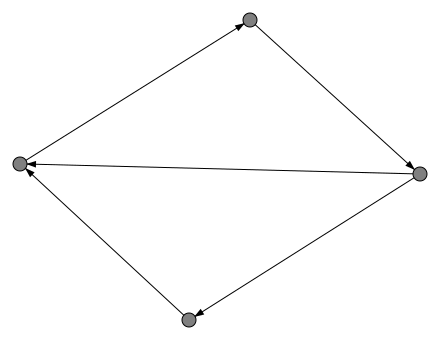

In [3]:
edge_list = [(0, 1), (1, 2), (2, 3), (3, 0), (0, 2)]
adjacency = edgelist2adjacency(edge_list)

image = svg_digraph(adjacency)
SVG(image)

By default, the graph is treated as directed, but you can easily make it undirected.

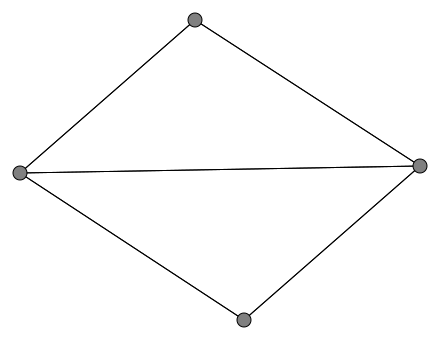

In [4]:
adjacency = edgelist2adjacency(edge_list, undirected=True)

image = svg_graph(adjacency)
SVG(image)

You might also want to add weights to your edges. Just use triplets instead of pairs!

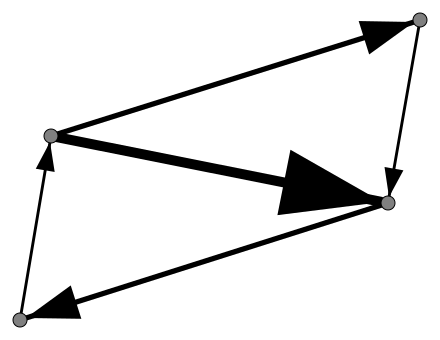

In [5]:
edge_list = [(0, 1, 1), (1, 2, 0.5), (2, 3, 1), (3, 0, 0.5), (0, 2, 2)]
adjacency = edgelist2adjacency(edge_list)

image = svg_digraph(adjacency)
SVG(image)

You can instantiate a bipartite graph as well.

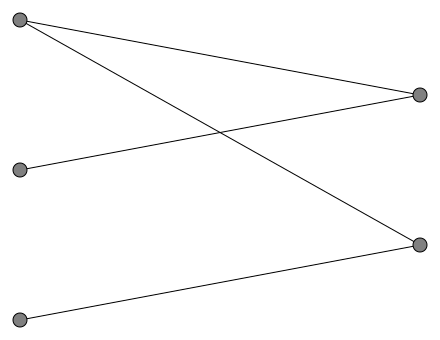

In [6]:
edge_list = [(0, 0), (1, 0), (1, 1), (2, 1)]
biadjacency = edgelist2biadjacency(edge_list)

image = svg_bigraph(biadjacency)
SVG(image)

If nodes are not indexed, convert them!

In [11]:
edge_list = [("Alice", "Bob"), ("Bob", "Carey"), ("Alice", "David"), ("Carey", "David"), ("Bob", "David")]
graph = convert_edge_list(edge_list)

You get a bunch containing the adjacency matrix and the name of each node.

In [13]:
graph

{'adjacency': <4x4 sparse matrix of type '<class 'numpy.bool_'>'
 	with 10 stored elements in Compressed Sparse Row format>,
 'names': array(['Alice', 'Bob', 'Carey', 'David'], dtype='<U5')}

In [15]:
adjacency = graph.adjacency
names = graph.names

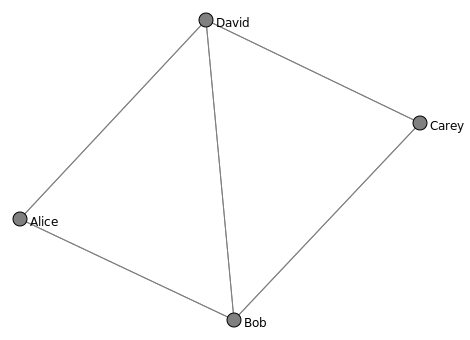

In [16]:
image = svg_graph(adjacency, names=names)
SVG(image)

Again, you can make the graph directed:

In [17]:
graph = convert_edge_list(edge_list, directed=True)

In [21]:
graph

{'adjacency': <4x4 sparse matrix of type '<class 'numpy.bool_'>'
 	with 5 stored elements in Compressed Sparse Row format>,
 'names': array(['Alice', 'Bob', 'Carey', 'David'], dtype='<U5')}

In [18]:
adjacency = graph.adjacency
names = graph.names

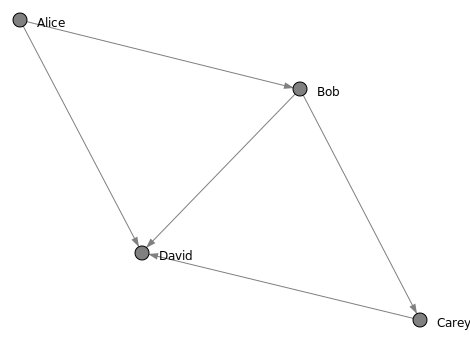

In [20]:
image = svg_digraph(adjacency, names=names)
SVG(image)

The graph can also be weighted:

In [33]:
edge_list = [("Alice", "Bob", 3), ("Bob", "Carey", 2), ("Alice", "David", 1), ("Carey", "David", 2), ("Bob", "David", 3)]
graph = convert_edge_list(edge_list)

In [34]:
adjacency = graph.adjacency
names = graph.names

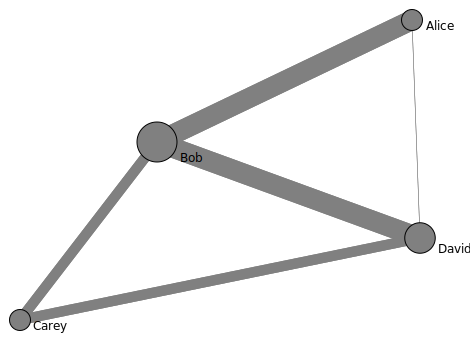

In [37]:
image = svg_graph(adjacency, names=names, display_edge_weight=True, display_node_weight=True)
SVG(image)

For a bipartite graph:

In [63]:
edge_list = [("Alice", "Football"), ("Bob", "Tennis"), ("David", "Football"), ("Carey", "Tennis"), ("Carey", "Football")]
graph = convert_edge_list(edge_list, bipartite=True)

In [64]:
biadjacency = graph.biadjacency
names = graph.names
names_col = graph.names_col

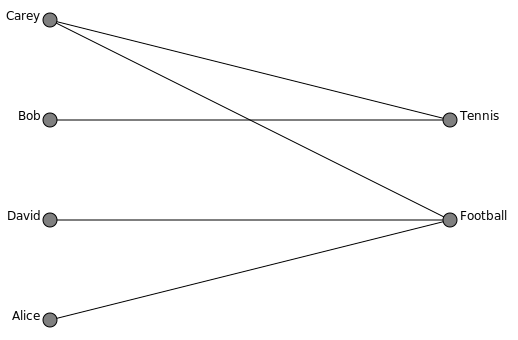

In [65]:
image = svg_bigraph(biadjacency, names_row=names, names_col=names_col)
SVG(image)

## From a dataframe

In [24]:
df = pd.read_csv('data/miserables.tsv', sep='\t', names=['character_1', 'character_2'])

In [25]:
df.head()

,character_1,character_2
0,Myriel,Napoleon
1,Myriel,Mlle Baptistine
2,Myriel,Mme Magloire
3,Myriel,Countess de Lo
4,Myriel,Geborand


In [51]:
edge_list = list(df.itertuples(index=False))

In [52]:
graph = convert_edge_list(edge_list)

In [53]:
graph

{'adjacency': <77x77 sparse matrix of type '<class 'numpy.bool_'>'
 	with 254 stored elements in Compressed Sparse Row format>,
 'names': array(['Anzelma', 'Babet', 'Bahorel', 'Bamatabois', 'Baroness',
        'Blacheville', 'Bossuet', 'Boulatruelle', 'Brevet', 'Brujon',
        'Champmathieu', 'Champtercier', 'Chenildieu', 'Child1', 'Child2',
        'Claquesous', 'Cochepaille', 'Combeferre', 'Cosette', 'Count',
        'Countess de Lo', 'Courfeyrac', 'Cravatte', 'Dahlia', 'Enjolras',
        'Eponine', 'Fameuil', 'Fantine', 'Fauchelevent', 'Favourite',
        'Feuilly', 'Gavroche', 'Geborand', 'Gervais', 'Gillenormand',
        'Grantaire', 'Gribier', 'Gueulemer', 'Isabeau', 'Javert', 'Joly',
        'Jondrette', 'Judge', 'Labarre', 'Listolier', 'Lt Gillenormand',
        'Mabeuf', 'Magnon', 'Marguerite', 'Marius', 'Mlle Baptistine',
        'Mlle Gillenormand', 'Mlle Vaubois', 'Mme Burgon', 'Mme Der',
        'Mme Hucheloup', 'Mme Magloire', 'Mme Pontmercy', 'Mme Thenardier',
     

In [71]:
df = pd.read_csv('data/movie_actor.tsv', sep='\t', names=['movie', 'actor'])

In [72]:
df.head()

,movie,actor
0,Inception,Leonardo DiCaprio
1,Inception,Marion Cotillard
2,Inception,Joseph Gordon Lewitt
3,The Dark Knight Rises,Marion Cotillard
4,The Dark Knight Rises,Joseph Gordon Lewitt


In [73]:
edge_list = list(df.itertuples(index=False))

In [74]:
graph = convert_edge_list(edge_list, bipartite=True)

In [75]:
graph

{'biadjacency': <15x16 sparse matrix of type '<class 'numpy.bool_'>'
 	with 41 stored elements in Compressed Sparse Row format>,
 'names': array(['007 Spectre', 'Aviator', 'Crazy Stupid Love', 'Drive',
        'Fantastic Beasts 2', 'Inception', 'Inglourious Basterds',
        'La La Land', 'Midnight In Paris', 'Murder on the Orient Express',
        'The Big Short', 'The Dark Knight Rises',
        'The Grand Budapest Hotel', 'The Great Gatsby', 'Vice'],
       dtype='<U28'),
 'names_row': array(['007 Spectre', 'Aviator', 'Crazy Stupid Love', 'Drive',
        'Fantastic Beasts 2', 'Inception', 'Inglourious Basterds',
        'La La Land', 'Midnight In Paris', 'Murder on the Orient Express',
        'The Big Short', 'The Dark Knight Rises',
        'The Grand Budapest Hotel', 'The Great Gatsby', 'Vice'],
       dtype='<U28'),
 'names_col': array(['Brad Pitt', 'Carey Mulligan', 'Christian Bale',
        'Christophe Waltz', 'Emma Stone', 'Johnny Depp',
        'Joseph Gordon Lewitt', 'Jud

## From a TSV file

You can directly load a graph from a TSV file:

In [78]:
graph = load_edge_list('data/miserables.tsv')

In [79]:
graph

{'adjacency': <77x77 sparse matrix of type '<class 'numpy.bool_'>'
 	with 508 stored elements in Compressed Sparse Row format>,
 'names': array(['Anzelma', 'Babet', 'Bahorel', 'Bamatabois', 'Baroness',
        'Blacheville', 'Bossuet', 'Boulatruelle', 'Brevet', 'Brujon',
        'Champmathieu', 'Champtercier', 'Chenildieu', 'Child1', 'Child2',
        'Claquesous', 'Cochepaille', 'Combeferre', 'Cosette', 'Count',
        'Countess de Lo', 'Courfeyrac', 'Cravatte', 'Dahlia', 'Enjolras',
        'Eponine', 'Fameuil', 'Fantine', 'Fauchelevent', 'Favourite',
        'Feuilly', 'Gavroche', 'Geborand', 'Gervais', 'Gillenormand',
        'Grantaire', 'Gribier', 'Gueulemer', 'Isabeau', 'Javert', 'Joly',
        'Jondrette', 'Judge', 'Labarre', 'Listolier', 'Lt Gillenormand',
        'Mabeuf', 'Magnon', 'Marguerite', 'Marius', 'Mlle Baptistine',
        'Mlle Gillenormand', 'Mlle Vaubois', 'Mme Burgon', 'Mme Der',
        'Mme Hucheloup', 'Mme Magloire', 'Mme Pontmercy', 'Mme Thenardier',
     

In [82]:
graph = load_edge_list('data/movie_actor.tsv', bipartite=True)

In [83]:
graph

{'biadjacency': <15x16 sparse matrix of type '<class 'numpy.bool_'>'
 	with 41 stored elements in Compressed Sparse Row format>,
 'names': array(['007 Spectre', 'Aviator', 'Crazy Stupid Love', 'Drive',
        'Fantastic Beasts 2', 'Inception', 'Inglourious Basterds',
        'La La Land', 'Midnight In Paris', 'Murder on the Orient Express',
        'The Big Short', 'The Dark Knight Rises',
        'The Grand Budapest Hotel', 'The Great Gatsby', 'Vice'],
       dtype='<U28'),
 'names_row': array(['007 Spectre', 'Aviator', 'Crazy Stupid Love', 'Drive',
        'Fantastic Beasts 2', 'Inception', 'Inglourious Basterds',
        'La La Land', 'Midnight In Paris', 'Murder on the Orient Express',
        'The Big Short', 'The Dark Knight Rises',
        'The Grand Budapest Hotel', 'The Great Gatsby', 'Vice'],
       dtype='<U28'),
 'names_col': array(['Brad Pitt', 'Carey Mulligan', 'Christian Bale',
        'Christophe Waltz', 'Emma Stone', 'Johnny Depp',
        'Joseph Gordon Lewitt', 'Jud

## From NetworkX

NetworkX has [import](https://networkx.github.io/documentation/stable/reference/generated/networkx.convert_matrix.from_scipy_sparse_matrix.html#networkx.convert_matrix.from_scipy_sparse_matrix) and [export](https://networkx.github.io/documentation/stable/reference/generated/networkx.convert_matrix.to_scipy_sparse_matrix.html#networkx.convert_matrix.to_scipy_sparse_matrix) functions from and towards the CSR format.

## Other options

* You have a GraphML file
* You want to test our toy graphs
* You want to generate a graph from a model
* You want to load a graph from one of our referenced repositories (see [NetSet](http://netset.telecom-paris.fr/) and [KONECT](http://konect.cc))

Take a look at the tutorials of the **data** section!